In [1]:
from typing import Callable, Any

In [2]:
import os
import sys
import time

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
np.random.seed(0)

In [5]:
pd.options.mode.copy_on_write = True

In [17]:
def setup_env():
    suffix = 'https://raw.githubusercontent.com/ahayasic/workshop-pandas-zero-to-hero/main/datasets'
    iris_df = pd.read_csv(f'{suffix}/toy/iris.csv')
    orders_df = pd.read_csv(f'{suffix}/toy/orders.csv')

    print('Setting datasets folder...')
    os.makedirs('datasets/toy/', exist_ok=True)

    print('Setting benchmarks folder...')
    os.makedirs('benchmarks/', exist_ok=True)

    print('Creating files...')
    iris_df.to_csv('datasets/toy/iris.csv', index=False)
    iris_df.to_csv('datasets/toy/iris.gzip', index=False, compression='gzip')
    iris_df.to_parquet('datasets/toy/iris.parquet', index=False)
    orders_df.to_csv('datasets/toy/orders.csv', index=False)

    print("You're ready to go!")

In [18]:
setup_env()

Setting datasets folder...
Setting benchmarks folder...
Creating files...
You're ready to go!


# Data storage and file formats

Loading and reading data is the first step in any data analysis or data processing task e a necessary step for using pandas capabilities. After all, without loading data, there's no data to analyse. Similarly, saving or exporting data is necessary for preserving the results of our work, sharing it with others, or using it in different applications.

This notebook focus on how to read and write data using pandas.

Most of time, you'll interact (read and write) with:

- Text files and binary formats.
- Databases.
- Web APIs and other network sources (mostly for reading data).

Let's go through these methods one by one

# Text and binary file formats

Text files store data in a human-readable format using characters and symbols. They are easy to create and view but can be inefficient for large datasets because they take up more space and require more processing power to read and write.

Binary files store data in a format that is directly readable by computers. They are more efficient in terms of storage and speed because they use a compact, non-readable format. However, they are not as easy to read and manipulate directly without special tools or libraries.

The Pandas I/O API provides several top-level reader functions for both binary and text formats, such as `pandas.read_csv()`, which generally return a pandas object. The corresponding writer functions are object methods accessed like `DataFrame.to_csv()`.

The text file reading functions parse text data into a DataFrame and their optional arguments fall into some categories:

- **Indexing**: Determine which columns to treat as the DataFrame index and whether to retrieve column names from the file, provided arguments, or not at all.
- **Type Inference and Data Conversion**: Include user-defined value conversions and custom lists of missing value markers.
- **Date and Time Parsing**: Combine date and time information spread over multiple columns into a single column.
- **Iteration**: Support for iterating over chunks of very large files.
- **Handling Unclean Data**: Options to skip rows or footers, handle comments, or deal with numeric data containing thousands separators.

Life isn't a bed of roses, so some text reading functions have a lot of optional arguments to help handle different real-world cases. It’s normal to feel overwhelmed by the many parameters but the online pandas documentation has many examples showing how to use these parameters.

## Reading text files

The main function for reading text files, especially CSV files, is `pandas.read_csv()`.

CSV (Comma-Separated Values) files are a popular data format widely used for storing and exchanging data due to their simplicity and human readability. A CSV file stores tabular data (numbers and text) in a row-oriented manner in plain text using a character encoding such as Unicode encodings (e.g., UTF-8). So each line in the file represents one data record, and each record consists of the same number of fields. These fields are separated by delimiters, such as commas, semicolons, or tabs. Sometimes, delimiters may include optional spaces, but each record maintains the same sequence of fields.

Despite their simplicity, CSV files lack strict standardization, which can lead to inconsistencies in how data is represented and interpreted. This is why `pandas.read_csv()` has many optional parameters to handle these variations.

Anyway, how do you handle a CSV file? Besides the mandatory `path` parameter, the most commonly used optional parameters are discussed below:

In [33]:
df = pd.read_csv('datasets/toy/iris.csv')
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Header

Not all files have a header row. If your file does not have a header, you can specify this in the header parameter.

In [34]:
df = pd.read_csv('datasets/toy/iris.csv', header=None)
df.head()

,0,1,2,3,4
0,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


### Column names

You can let pandas assign default column names or specify them yourself using the names parameter:

In [35]:
column_names = ['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)', 'Class']
df = pd.read_csv('datasets/toy/iris.csv', names=column_names, skiprows=1)
df.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Separator and delimiter

Sometimes, a table might not have a fixed delimiter and uses whitespace or other patterns to separate fields. You can handle these cases by specifying the delimiter character or a regular expression as a delimiter using `delimiter`parameter. For example, to handle fields separated by semi colons (;) you can use:

In [36]:
df = pd.read_csv('datasets/toy/iris.csv', delimiter=';')
df.head()

,"sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class"
0,"5.1,3.5,1.4,0.2,Iris-setosa"
1,"4.9,3.0,1.4,0.2,Iris-setosa"
2,"4.7,3.2,1.3,0.2,Iris-setosa"
3,"4.6,3.1,1.5,0.2,Iris-setosa"
4,"5.0,3.6,1.4,0.2,Iris-setosa"


### Indexing

You can set a specific column as the index of your DataFrame using the index_col parameter. Note that if there are fewer column names than data rows, pandas will automatically infer that the first column should be the DataFrame’s index.

For example:

In [37]:
df = pd.read_csv('datasets/toy/iris.csv', index_col=4)
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


To create a hierarchical index from multiple columns, pass a list of column numbers or names:

In [38]:
df = pd.read_csv('datasets/toy/iris.csv', index_col=[4,3])
df.head()

sepal length in cm  sepal width in cm  \
class       petal width in cm                                          
Iris-setosa 0.2                               5.1                3.5   
            0.2                               4.9                3.0   
            0.2                               4.7                3.2   
            0.2                               4.6                3.1   
            0.2                               5.0                3.6   

                               petal length in cm  
class       petal width in cm                      
Iris-setosa 0.2                               1.4  
            0.2                               1.4  
            0.2                               1.3  
            0.2                               1.5  
            0.2                               1.4

### Compression

Pandas can read compressed files directly. Use the compression parameter to specify the type of compression:

In [39]:
df = pd.read_csv('datasets/toy/iris.gzip', compression='gzip')
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Engine

In the context of exporting and reading data on pandas, an engine refers to the underlying software that performs the actual parsing of the CSV file. For reading CSV files, pandas supports two types of engines:

- **Python Engine**: This is the original engine implemented in pure Python. It is more flexible and can handle more complex cases, such as irregular CSV files or advanced parsing options. However, it may be slower compared to the C engine, especially for large files.
- **C Engine**: This engine is implemented in C, making it much faster than the Python engine. It is suitable for handling large CSV files efficiently. However, it may not support all the features and options that the Python engine does.

By default, pandas tries to use the C engine for better performance and falls back to the Python engine if it encounters an error or if the requested features are not supported by the C engine.

You can specify which engine to use with the `engine` parameter. Indeed, for certain file types, you may need to specify the parsing engine explicitly.

More details can be found in the pandas documentation.

## Writing text files

Using the DataFrame’s `to_csv` method, we can write data to a text file or `sys.stdout`. Just like the read method, the `path` parameter is mandatory, while there are many optional parameters.

The default behavior of `to_csv` is to export the data to a comma-separated values (CSV) file:

In [40]:
df = pd.DataFrame({
    'OrderID': [1001, 1002, 1003, 1004, 1005],
    'DishName': ['Spaghetti Carbonara', 'Chicken Alfredo', 'Margherita Pizza', 'Caesar Salad', 'Tiramisu'],
    'Quantity': [2, 1, 3, None, None],
    'Price': [112.50, 114.00, 110.00, 18.00, 16.50]
})

df.to_csv('/tmp/dummy_orders.csv')

### Separator and delimiter

You can use other delimiters instead of commas. For example, to use a semicolon as a delimiter, use the `sep` parameter:

In [41]:
df.to_csv('/tmp/dummy_orders.csv', sep=';')

### Header and index

By default, both `index` and `header` (column labels) are written to the output file. You can disable one or both:

In [42]:
df.to_csv('/tmp/dummy_orders.csv', index=None)

### Columns to save

You can write only a subset of the columns and specify their order using `columns` argument:

In [43]:
df.to_csv('/tmp/dummy_orders.csv', columns=['OrderID', 'Price'])

### Missing values

Missing values appear as empty strings in the output. You can specify a different value to represent missing data using `na_rep` parameter:

In [44]:
df.to_csv('/tmp/dummy_orders.csv', na_rep='null')

## CSV Limitations and Drawbacks

Storing data as plain text and without proper standardization has many drawbacks. These issues may not seem significant for people working informally with small datasets. However, as the size and complexity of the dataset increase, the limitations become evident and significantly detrimental, leading to increased computing and storage costs.

- **File Size Inflation**: CSV files serialize data using character encoding techniques like UTF-8, which often represent characters with multiple bytes. Consequently, file size inflates because each piece of data is converted to a uniform string format. For example, an integer that could be stored in 4 bytes in a binary format might take up to 10 bytes when represented as text in a CSV file. The use of delimiters and newline characters further increases file size.
- **Lack of Native Compression**: CSV files do not support native compression techniques such as run-length encoding, dictionary encoding, or delta encoding, which can significantly reduce the size of large datasets.
- **Increased Read/Write Time**: Writing CSV files requires converting each data type to a string and then serializing these strings. This process is not only computationally expensive but also inefficient for large data representations. The larger the data size, the longer the read and write times.
- **No Schema Evolution**: Updating an existing CSV dataset can be problematic if the data structure changes, such as adding a new column. This change requires rewriting the entire dataset.
- **Full File Scan Required**: To process or query a CSV file, systems typically need to read the entire file from start to finish. CSV does not support indexing, partitioning, column pruning, predicate pushdown, or other mechanisms to quickly locate and access specific segments of data.
- **No Support for Complex Types**: CSV files are flat and cannot handle nested types like JSON, limiting what can be done while manipulating data in pandas.

## Apache Parquet

Apache Parquet is an open source, binary, column-oriented data file format designed for efficient big data processing, particularly within distributed computing frameworks like Apache Hadoop and Apache Spark. Parquet's columnar storage model segregates data by columns rather than rows, enabling more effective data compression and selective data access. This model is highly advantageous for read-heavy workloads, as queries typically access only a subset of columns.

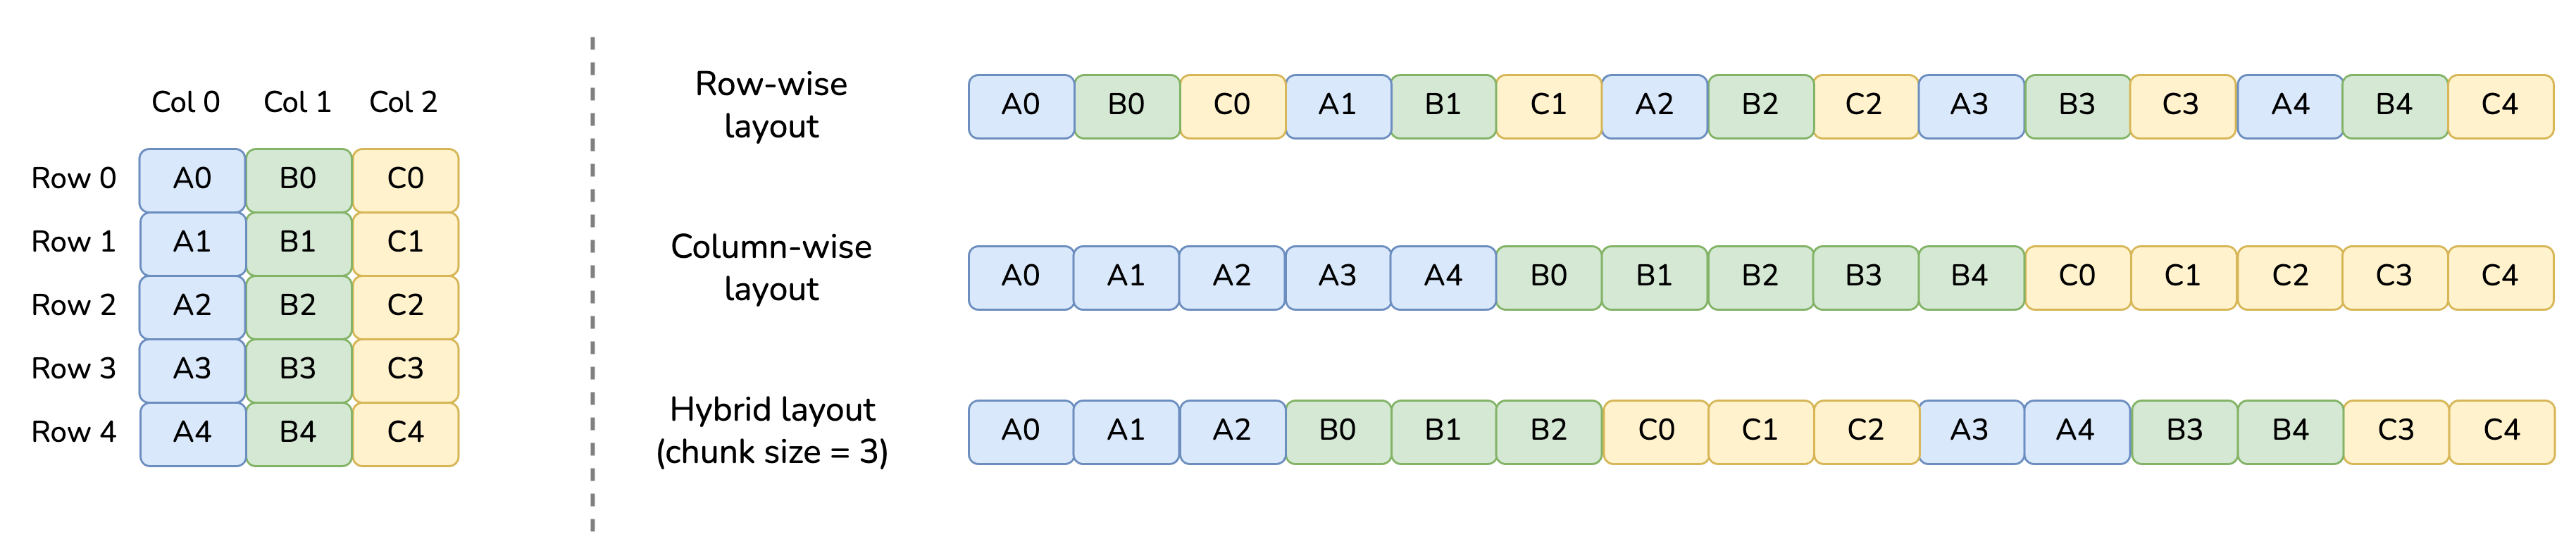

Parquet employs a metadata file that encapsulates detailed information about the schema and data, which facilitates intelligent decision-making during data storage, retrieval, and writing processes. Indeed, most of Parquet's capabilities come from the utilization of the metadata.

Moreover, Parquet is built from the ground up with complex nested data structures in mind and uses record shredding and assembly algorithms to handle such data very efficiently.

By using a columnar storage format with rich metadata information and state-of-the-art optimization algorithms, Parquet has a lot of capabilities:

- **Data Locality**: Columnar storage improves data locality by storing each column's data contiguously, reducing disk seek times during read operations.
- **Column Pruning**: Only the necessary columns are loaded into memory, saving significant memory and speeding up query execution.
- **Partitioning:** By partitioning, you divide the dataset into smaller, manageable parts based on the values of specific columns, typically those frequently used in queries. Partitioning enables efficient data skipping and selective reading, reducing the amount of data scanned and improving query performance.
- **Predicate Pushdown and Vectorized Execution**: Filtering operations can be pushed down to the storage layer, and vectorized execution processes batches of columnar data simultaneously, leveraging CPU capabilities for faster query execution.
- **Compression Efficiency:** Homogeneous column data allows for more efficient compression using techniques like run-length encoding (RLE) and dictionary encoding, reducing storage footprint and enhancing I/O performance.
- **Data Type Specific Optimizations:** Specialized encoding techniques exploit the properties of different data types for improved compression and query speed.
- **CPU Cache Utilization:** Columnar storage aligns well with modern CPU architectures that are optimized for cache-friendly access patterns. When processing data, CPUs can load columnar data into cache more efficiently, as the access patterns are more predictable and sequential. This reduces cache misses and improves the overall speed of data processing operations.

### Reading Parquet files

For reading parquet files in pandas we use `read_parquet()`.

Note that is necessary have the `pyarrow` package installed.

In [45]:
df = pd.read_parquet('datasets/toy/iris.parquet')
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The Parquet format has the capability of column pruning, which allows you to read only specific columns from the Parquet file, which can save memory and speed up the read operation if you only need a subset of the columns (specially in large datasets).

In [46]:
df = pd.read_parquet('datasets/toy/iris.parquet', columns=['sepal length in cm', 'petal length in cm', 'class'])
df.head()

,sepal length in cm,petal length in cm,class
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


You can also filter rows directly when reading from a Parquet file by using the filters parameter available with the `pyarrow` engine. This capability is known as predicate pushdown.

In [47]:
df = pd.read_parquet('datasets/toy/iris.parquet', filters=[('sepal length in cm', '>', 5)])
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,5.4,3.9,1.7,0.4,Iris-setosa
2,5.4,3.7,1.5,0.2,Iris-setosa
3,5.8,4.0,1.2,0.2,Iris-setosa
4,5.7,4.4,1.5,0.4,Iris-setosa


Obviously, you can combine both column and row filtering to load even more specific data segments and speed up reading even more.

In [48]:
df = pd.read_parquet(
    path='datasets/toy/iris.parquet',
    columns=['sepal length in cm', 'class'], 
    filters=[('sepal length in cm', '>', 5)],
)
df.head()

,sepal length in cm,class
0,5.1,Iris-setosa
1,5.4,Iris-setosa
2,5.4,Iris-setosa
3,5.8,Iris-setosa
4,5.7,Iris-setosa


### Writing Parquet files

To export DataFrames to Parquet format, use the `DataFrame.to_parquet()` method with a `path` parameter:

In [49]:
df = pd.DataFrame({
    'OrderID': [1001, 1002, 1003, 1004, 1005],
    'DishName': ['Spaghetti Carbonara', 'Chicken Alfredo', 'Margherita Pizza', 'Caesar Salad', 'Tiramisu'],
    'Quantity': [2, 1, 3, None, None],
    'Price': [112.50, 114.00, 110.00, 18.00, 16.50]
})
df.to_parquet('/tmp/dummy_orders.parquet')

#### Compression

By default, `to_parquet` uses a compression algorithm to reduce file size. Until pandas 2.2, the default option was `snappy`.  Other available options are `gzip`, `brotli`, `lz4`, `zstd`, and `None` for no compression. To choose the compression method, use the `compression` argument.

In [50]:
df.to_parquet('/tmp/dummy_orders.parquet.gzip', compression='gzip')

#### Partitioning

Partitioning is a method of organizing data to improve query performance, and it is a key feature of Parquet. By partitioning, you divide the dataset into smaller, manageable parts based on the values of specific columns, typically those frequently used in queries.

Partitioning is especially useful for large datasets because it enables efficient data skipping and selective reading. This reduces the amount of data scanned and improves query performance.

To write a partitioned Parquet file, specify the columns to partition by using the `partition_cols` parameter:

In [51]:
df.to_parquet(
    path='/tmp/dummy_orders_partitioned.parquet',
    partition_cols=['DishName'],
    existing_data_behavior='delete_matching',
)

In [52]:
!ls -ilh /tmp/dummy_orders_partitioned.parquet

total 0
3870059 drwxr-xr-x 3 ahayasic wheel 96 Jun 30 17:56 'DishName=Caesar%20Salad'
3870054 drwxr-xr-x 3 ahayasic wheel 96 Jun 30 17:56 'DishName=Chicken%20Alfredo'
3870056 drwxr-xr-x 3 ahayasic wheel 96 Jun 30 17:56 'DishName=Margherita%20Pizza'
3870055 drwxr-xr-x 3 ahayasic wheel 96 Jun 30 17:56 'DishName=Spaghetti%20Carbonara'
3870060 drwxr-xr-x 3 ahayasic wheel 96 Jun 30 17:56 'DishName=Tiramisu'


#### Engine

Just like with CSV files, when reading and writing Parquet files, you need to specify an engine. The most recommended and default option is `pyarrow`.

The `pyarrow` engine supports advanced features like multithreading, which allows for faster read and write operations by parallelizing tasks. It also supports essential Parquet features like filtering and column pruning.

By using the capabilities of the `pyarrow` engine, pandas can handle large datasets more effectively, providing strong performance for large datasets.

### Conclusion

Parquet format is a highly intelligent and versatile format with numerous parameters to control its behavior, making it very performant for a variety of scenarios. These parameters include partitioning techniques, setting the maximum number of rows per file, maximum number of partitions, among others.

Since the `DataFrame.to_parquet` method in pandas is essentially a wrapper over the `pyarrow.dataset.write_dataset` method (when using `pyarrow` engine), it's recommended to check the [pyarrow documentation](https://arrow.apache.org/docs/python/generated/pyarrow.dataset.write_dataset.html#pyarrow.dataset.write_dataset) for more detailed information.

# Benchmark: CSV x Parquet

To clarify the limitations of the CSV format and the performance of the Parquet format, this section contains a naive benchmark. This benchmark is good enough to demonstrate how a file format designed for large datasets can be overwhelmingly superior to simple plain text.

The benchmark includes tests to evaluate the writing time, reading time, and file size on disk, using both string and decimal data types. The tests cover a variety of options, including:

- Uncompressed CSV
- Uncompressed Parquet
- CSV compressed with gzip
- Parquet compressed with gzip
- Parquet compressed with snappy

The results are presented in bar graphs.

At the end, there is a section that demonstrates how much better reading a Parquet file can be when using appropriate data skipping techniques, such as column pruning and filtering by partitioning.

In [53]:
def timeit(fn: Callable, *args: Any, **kwargs: Any):
    start_time = time.time()
    fn(*args, **kwargs)
    return time.time() - start_time

In [54]:
def generate_dummy_string_dataset(n_rows: int, n_cols: int, sample: list[str] | None = None):
    if sample is None:
        sample = ['apple', 'banana', 'orange', 'grape', 'strawberry']

    values = np.random.choice(sample, size=(n_rows, n_cols))
    columns = [f'col_{i}' for i in range(0, n_cols)]
    return pd.DataFrame(values, columns=columns)

In [55]:
def generate_dummy_float_dataset(n_rows: int, n_cols: int, precision: int = 7):
    values = np.random.uniform(low=10, high=100, size=(n_rows, n_cols)).round(precision)
    columns = [f'col_{i}' for i in range(0, n_cols)]
    return pd.DataFrame(values, columns=columns, dtype=np.float32)

In [56]:
def run_benchmark(df):
    files_path = {
        'uncompressed_csv': 'benchmarks/uncompressed_csv_data.csv',
        'uncompressed_parquet': 'benchmarks/uncompressed_parquet_data.parquet',
        'csv_gzip': 'benchmarks/csv_data.csv.gzip',
        'parquet_gzip': 'benchmarks/parquet_data.parquet.gzip',
        'parquet_snappy': 'benchmarks/parquet_data.parquet.snappy',
    }

    benchmark_data = {
        'uncompressed_csv': {},
        'uncompressed_parquet': {},
        'csv_gzip': {},
        'parquet_gzip': {},
        'parquet_snappy': {},
    }

    # Write time
    # Uncompressed CSV
    elapsed = timeit(df.to_csv, files_path['uncompressed_csv'], compression=None)
    benchmark_data['uncompressed_csv']['write_time'] = elapsed

    # Uncompressed Parquet
    elapsed = timeit(df.to_parquet, files_path['uncompressed_parquet'], compression=None)
    benchmark_data['uncompressed_parquet']['write_time'] = elapsed

    # CSV (gzip)
    elapsed = timeit(df.to_csv, files_path['csv_gzip'], compression='gzip')
    benchmark_data['csv_gzip']['write_time'] = elapsed

    # Parquet (gzip)
    elapsed = timeit(df.to_parquet, files_path['parquet_gzip'], compression='gzip')
    benchmark_data['parquet_gzip']['write_time'] = elapsed

    # Parquet (snappy)
    elapsed = timeit(df.to_parquet, files_path['parquet_snappy'], compression='snappy')
    benchmark_data['parquet_snappy']['write_time'] = elapsed

    # File size
    for approach, path in files_path.items():
        size = os.path.getsize(path)
        benchmark_data[approach]['size'] = size

    # Read time
    # Uncompressed CSV
    elapsed = timeit(pd.read_csv, files_path['uncompressed_csv'] , compression=None)
    benchmark_data['uncompressed_csv']['read_time'] = elapsed

    # Uncompressed Parquet
    elapsed = timeit(pd.read_parquet, files_path['uncompressed_parquet'])
    benchmark_data['uncompressed_parquet']['read_time'] = elapsed

    # CSV (gzip)
    elapsed = timeit(pd.read_csv, files_path['csv_gzip'], compression='gzip')
    benchmark_data['csv_gzip']['read_time'] = elapsed

    # Parquet (gzip)
    elapsed = timeit(pd.read_parquet, files_path['parquet_gzip'])
    benchmark_data['parquet_gzip']['read_time'] = elapsed

    # Parquet (snappy)
    elapsed = timeit(pd.read_parquet, files_path['parquet_snappy'])
    benchmark_data['parquet_snappy']['read_time'] = elapsed

    df = pd.DataFrame(benchmark_data).T.reset_index()
    df['size'] = df['size'] / (1024 ** 2)
    df['cost'] = (df['size'] / 1024) * 0.0023

    df = df[['index', 'write_time', 'read_time', 'size', 'cost']].rename(columns={
        'index': 'Approach',
        'write_time': 'Write Time (s)',
        'read_time': 'Read Time (s)',
        'size': 'Size (MB)',
        'cost': 'Approx. Cost S3 ($)',
    })
    return df

In [57]:
df = generate_dummy_float_dataset(n_rows=1_000_000, n_cols=20)
# df = generate_dummy_string_dataset(1_000_000, 10)
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,59.393215,74.367043,64.248703,59.039486,48.128933,68.130470,49.382851,90.259567,96.729645,44.509735,81.255257,57.600544,61.124012,93.303696,16.393246,17.841637,11.819655,84.935783,80.034111,88.301094
1,98.075653,81.924271,51.533142,80.247627,20.644699,67.592896,22.901796,95.020203,56.966351,47.319576,33.810005,79.681030,51.053532,61.159054,11.691082,65.587196,65.088615,65.524063,94.937325,71.363831
2,42.355713,49.332874,72.786804,15.420293,70.009003,70.357407,28.934431,21.603367,38.388550,42.733971,61.317711,49.474136,98.953644,19.184032,28.798908,24.517857,68.779747,32.796246,51.967968,31.998302
3,24.307262,19.933764,69.069664,22.436466,27.692413,43.185265,83.889389,18.739115,85.415039,18.648857,97.881355,52.178608,97.908501,64.436096,76.533722,13.526901,35.452625,20.817690,36.652618,20.685495
4,38.618484,47.283669,15.773274,72.322495,60.994129,33.885056,57.092323,18.454645,61.835186,93.636658,38.671207,70.066933,21.861807,74.469452,36.046547,26.487223,62.786163,11.809679,84.604599,10.422593


In [58]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   col_0   1000000 non-null  float32
 1   col_1   1000000 non-null  float32
 2   col_2   1000000 non-null  float32
 3   col_3   1000000 non-null  float32
 4   col_4   1000000 non-null  float32
 5   col_5   1000000 non-null  float32
 6   col_6   1000000 non-null  float32
 7   col_7   1000000 non-null  float32
 8   col_8   1000000 non-null  float32
 9   col_9   1000000 non-null  float32
 10  col_10  1000000 non-null  float32
 11  col_11  1000000 non-null  float32
 12  col_12  1000000 non-null  float32
 13  col_13  1000000 non-null  float32
 14  col_14  1000000 non-null  float32
 15  col_15  1000000 non-null  float32
 16  col_16  1000000 non-null  float32
 17  col_17  1000000 non-null  float32
 18  col_18  1000000 non-null  float32
 19  col_19  1000000 non-null  float32
dtypes: float32(20)
memory usa

In [59]:
results = run_benchmark(df)
results

,Approach,Write Time (s),Read Time (s),Size (MB),Approx. Cost S3 ($)
0,uncompressed_csv,8.315328,1.069387,187.164689,0.000420
1,uncompressed_parquet,0.322729,0.068029,88.147775,0.000198
2,csv_gzip,18.021166,1.887660,86.166636,0.000194
3,parquet_gzip,3.352165,0.154716,78.394927,0.000176
4,parquet_snappy,1.189881,0.041654,88.152008,0.000198


In [60]:
def plot_times(df):
    """
    Plotting the Write Time and Read Time
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Approach', y='value', hue='variable',
        data=pd.melt(df, id_vars=['Approach'], value_vars=['Write Time (s)', 'Read Time (s)'])
    )
    plt.title('Write Time and Read Time for Different Approaches')
    plt.ylabel('Time (s)')
    plt.xticks(rotation=45)
    plt.legend(title='Time Type')
    plt.tight_layout()
    plt.show()

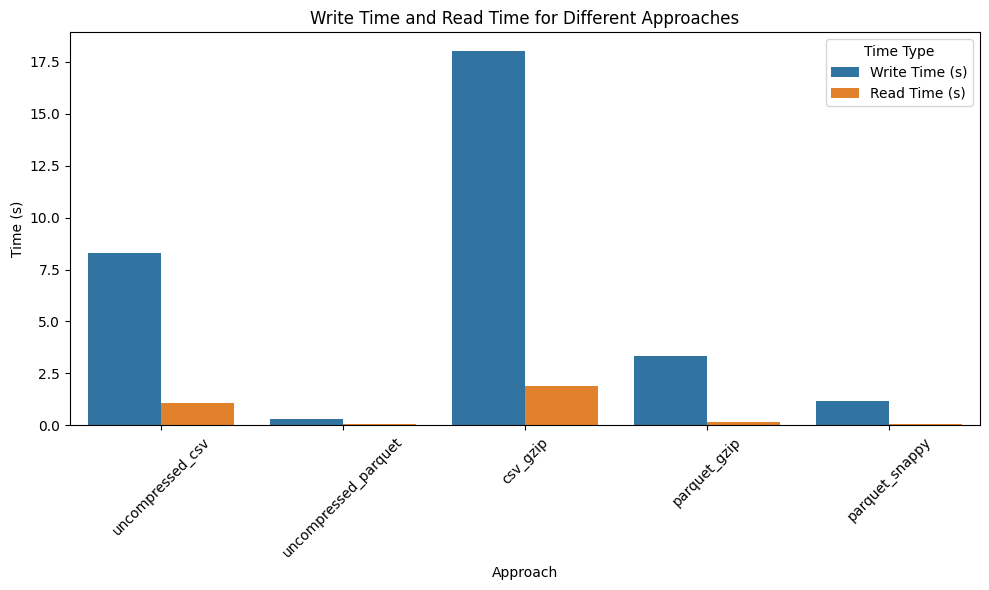

In [61]:
plot_times(results)

In [62]:
def plot_sizes(df):
    """
    Plot file sizes
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Approach', y='Size (MB)', data=results)
    plt.title('Size for Different Approaches')
    plt.ylabel('Size (MB)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

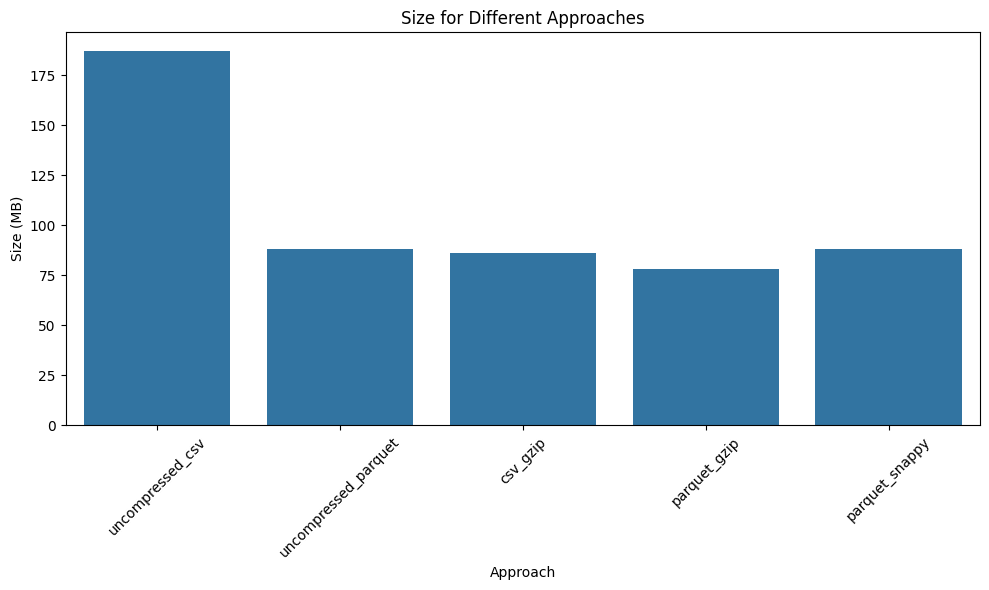

In [63]:
plot_sizes(results)

In [64]:
speedup_df = results.copy()

baseline = speedup_df[speedup_df['Approach'] == 'uncompressed_csv'].iloc[0]
speedup_df['Write Speedup'] = baseline['Write Time (s)'] / speedup_df['Write Time (s)']
speedup_df['Read Speedup'] = baseline['Read Time (s)'] / speedup_df['Read Time (s)']
speedup_df['Size Savings'] = (baseline['Size (MB)'] - speedup_df['Size (MB)']) / baseline['Size (MB)'] * 100

speedup_df[['Approach', 'Write Speedup', 'Read Speedup', 'Size Savings']]

,Approach,Write Speedup,Read Speedup,Size Savings
0,uncompressed_csv,1.000000,1.000000,0.000000
1,uncompressed_parquet,25.765677,15.719537,52.903630
2,csv_gzip,0.461420,0.566515,53.962130
3,parquet_gzip,2.480584,6.911934,58.114467
4,parquet_snappy,6.988369,25.673024,52.901368


## Column pruning & Predicate pushdown

In this section, we compare the gains on read time by comparing CSV read method and Parquet read method with column pruning and partition filtering.

In [65]:
parquet_file = 'benchmarks/partitionated_parquet_file.parquet'
csv_file = 'benchmarks/csv_file.csv'
interest_cols = ['partitions', 'col_0', 'col_3']

In [66]:
df = generate_dummy_float_dataset(n_rows=100_000, n_cols=1_000)

n_rows, n_cols = df.shape
partitions = pd.cut(range(n_rows), bins=5, labels=['A', 'B', 'C', 'D', 'E'])
df['partitions'] = partitions

df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_991,col_992,col_993,col_994,col_995,col_996,col_997,col_998,col_999,partitions
0,89.248711,37.603851,20.363548,17.504734,21.644325,28.161369,30.433680,53.451813,16.328056,49.190334,...,24.824411,43.283302,22.722332,20.444397,29.609791,25.178055,36.325378,11.236506,23.873638,A
1,53.314079,51.195210,34.270744,29.299641,39.987232,10.306245,40.421406,34.916492,71.245239,51.096603,...,86.021225,54.393333,72.846077,95.888855,76.277267,76.284157,16.480238,22.496332,18.814972,A
2,55.063683,44.910072,62.353760,38.306995,63.036522,55.290237,69.001884,24.563604,93.460197,69.825500,...,85.253662,59.736080,74.340813,26.505960,46.701546,70.543739,12.046461,14.346392,60.117142,A
3,26.819809,89.579292,21.952145,47.726246,26.082291,41.014973,30.505917,45.584164,76.441650,17.501364,...,33.460159,80.307785,49.087177,89.912338,20.022747,64.380272,11.011269,86.494621,18.006157,A
4,60.177605,62.691174,73.883690,22.110422,75.856026,69.537086,74.519951,59.971252,58.877762,72.697876,...,99.550652,94.202805,15.950603,53.541828,75.075943,85.708908,33.154510,41.117493,22.862331,A


In [67]:
df.to_csv(csv_file, compression=None)
df.to_parquet(parquet_file, compression=None, partition_cols=['partitions'])

In [68]:
start_time = time.time()

ddf = pd.read_csv(csv_file, usecols=interest_cols, engine='pyarrow')
ddf = ddf[ddf['partitions']=='A']

elapsed_csv = time.time() - start_time
print(f'Elapsed time {elapsed_csv:.3f} seconds')

Elapsed time 0.810 seconds


In [69]:
start_time = time.time()

pdf = pd.read_parquet(parquet_file, columns=interest_cols, filters=[('partitions', '==', 'A')], engine='pyarrow')

elapsed_parquet = time.time() - start_time
print(f'Elapsed time {elapsed_parquet:.3f} seconds')

Elapsed time 0.054 seconds


In [70]:
print(f'Column pruning and predicate pushdown read speedup: {elapsed_csv / elapsed_parquet:.1f}x')

Column pruning and predicate pushdown read speedup: 15.1x


# Databases

Pandas provides an API to also interact with databases for I/O operations, specially SQL databases. To read data from databases into a DataFrame you use `pd.read_sql` which expects an SQL Query or a table name and a database conection (ADBC Connection, SQLAlchemy connectable, str, or sqlite3 connection).

Many optional parameters to control header, indexing and type Inference and Data Conversion are available too. Check the documentation.

In [71]:
!pip install sqlalchemy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.1 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [72]:
# To show how read data from a SQL databases
# let's first create it
import sqlite3

def create_db():
    data = [
        (1001, 'Spaghetti Carbonara', 2, 112.50, 'Main Course'),
        (1002, 'Chicken Alfredo', 1, 114.00, 'Main Course'),
        (1003, 'Margherita Pizza', 3, 110.00, 'Main Course'),
        (1004, 'Caesar Salad', 1, 18.00, 'Starter'),
        (1005, 'Tiramisu', 2, 16.50, 'Dessert'),
        (1006, 'Lasagna', 1, 111.00, 'Main Course'),
        (1007, 'Minestrone Soup', 2, 17.50, 'Starter'),
        (1008, 'Ravioli', 4, 113.00, 'Main Course'),
        (1009, 'Panna Cotta', 1, 15.50, 'Dessert'),
        (1010, 'Bruschetta', 3, 19.00, 'Starter')
    ]

    # Connect to an in-memory SQLite database
    conn = sqlite3.connect(':memory:')
    cursor = conn.cursor()

    # Create the table
    cursor.execute(
        '''
        CREATE TABLE orders (
            OrderID INTEGER,
            DishName TEXT,
            Quantity INTEGER,
            Price REAL,
            Category TEXT
        )
        '''
    )

    # Insert data into the table
    cursor.executemany(
        '''
        INSERT INTO orders (OrderID, DishName, Quantity, Price, Category)
        VALUES (?, ?, ?, ?, ?)
        ''',
        data
    )

    # Commit the transaction
    conn.commit()

    return conn

In [73]:
conn = create_db()

In [74]:
# Reading data with pd.read_sql

df = pd.read_sql("SELECT * FROM orders", conn)
df.head()

,OrderID,DishName,Quantity,Price,Category
0,1001,Spaghetti Carbonara,2,112.5,Main Course
1,1002,Chicken Alfredo,1,114.0,Main Course
2,1003,Margherita Pizza,3,110.0,Main Course
3,1004,Caesar Salad,1,18.0,Starter
4,1005,Tiramisu,2,16.5,Dessert


In [75]:
# Since it will run any SQL query and try to serialize it into a DataFrame,
# you justneed to write the query you want

df = pd.read_sql(
    '''
    SELECT Category, AVG(PRICE) as PriceAvg
    FROM orders
    GROUP BY Category
    ''',
    
    conn
)
display(df)

,Category,PriceAvg
0,Dessert,16.000000
1,Main Course,112.100000
2,Starter,18.166667


Analogously, to write a DataFrame to a table in a relational database we just need to use DataFrame.to_sql with the table name and database connection.

Note that `to_sql` returns the number of rows affected by the operation.

Furthermore, `to_sql` contains several optional parameters to control behaviors like How to behave if the table already exists (fail, append or upsert), Controls the SQL insertion clause used (row-by-row or bulk), etc. For more detailed information, check the documentation.

In [76]:
df.to_sql('orders_summary', conn)

3

In [77]:
df = pd.read_sql('SELECT * FROM orders_summary', conn)
display(df)

,index,Category,PriceAvg
0,0,Dessert,16.000000
1,1,Main Course,112.100000
2,2,Starter,18.166667


# Conclusion

Loading and reading data is an important first step in any data analysis or processing task. The Pandas I/O API offers several top-level reader functions for both binary and text formats. For text formats, we primarily use pd.read_csv for reading and DataFrame.to_csv for writing. Both methods offer many optional parameters to control the reading and writing behavior, ensuring the text file is properly interpreted.

However, despite their popularity, text files like CSV are inefficient for large datasets, especially when compared to binary formats. Binary formats include many optimizations that allow for efficient data storage and I/O.

Pandas supports various binary formats, with Parquet being one of the most well-known. Parquet is an open-source, binary, column-oriented data format designed for efficient big data processing and offers numerous capabilities, such as:

- Efficient data compression and encoding schemes enabling read/write operations.
- Ability to handle complex data types (e.g., nested structures).
- Optimized for parallel processing
- Data skipping

Therefore, unless you are going to save data with the intention of it being human readable, use binary formats, possibly parquet.

Finally, you can also read and write data from/to SQL databases using `pd.read_sql` and `DataFrame.to_sql`.

# References

- [What is Parquet? on Databricks](https://www.databricks.com/glossary/what-is-parquet)
- [The Parquet Format and Performance Optimization Opportunities by Boudewijn Braams on YouTube](https://www.youtube.com/watch?v=1j8SdS7s_NY)
- [Demystifying the Parquet File Format by Michael Berk on Medium](https://towardsdatascience.com/demystifying-the-parquet-file-format-13adb0206705)
- [File Format on Apache Parquet Official Docs](https://parquet.apache.org/docs/file-format/)
